<a href="https://colab.research.google.com/github/syadrn/MSIB-K2-KelasAwanPintar/blob/main/Logika%20dan%20Konsep%20AI/ML_2_Regresi_Lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2 Regresi Lanjutan

Sebelum mulai:
*   Student yang pakai Colab, silahkan "Save a Copy in Drive" dahulu
*   Student yang pakai Jupyter Notebook, silahkan download code ini dahulu



# Import Library

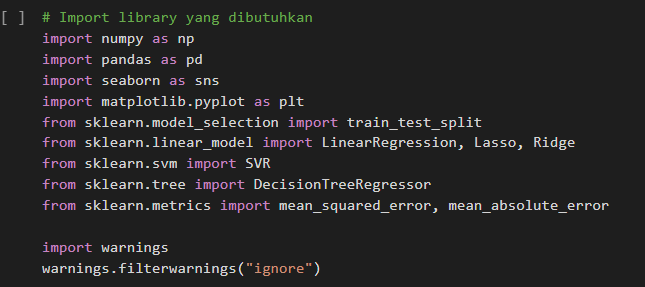

In [ ]:
# Import library-library yang diperlukan
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi data dalam bentuk DataFrame
import seaborn as sns  # Untuk visualisasi data
import matplotlib.pyplot as plt  # Untuk membuat plot
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi data latih dan data uji
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # Model-model regresi linear
from sklearn.svm import SVR  # Model Support Vector Regression
from sklearn.tree import DecisionTreeRegressor  # Model Decision Tree Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Metrik evaluasi model
import warnings  # Untuk mengelola peringatan
warnings.filterwarnings('ignore')  # Mengabaikan semua peringatan


# Load Dataset
https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv

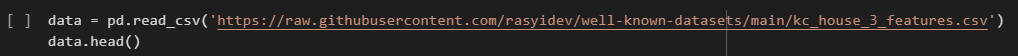

In [ ]:
# membaca data file csv yg berada di github
# URL file CSV berisi dataset tentang rumah di Seattle
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')

# Menampilkan 5 baris pertama dari DataFrame untuk melihat sekilas data
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

# 1. Analisis Korelasi

Lakukan analisis korelasi terhadap dataset.

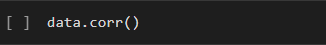

In [ ]:
# menghitung matrik kolerasi
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


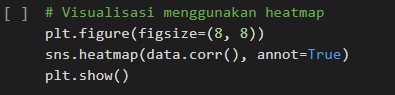

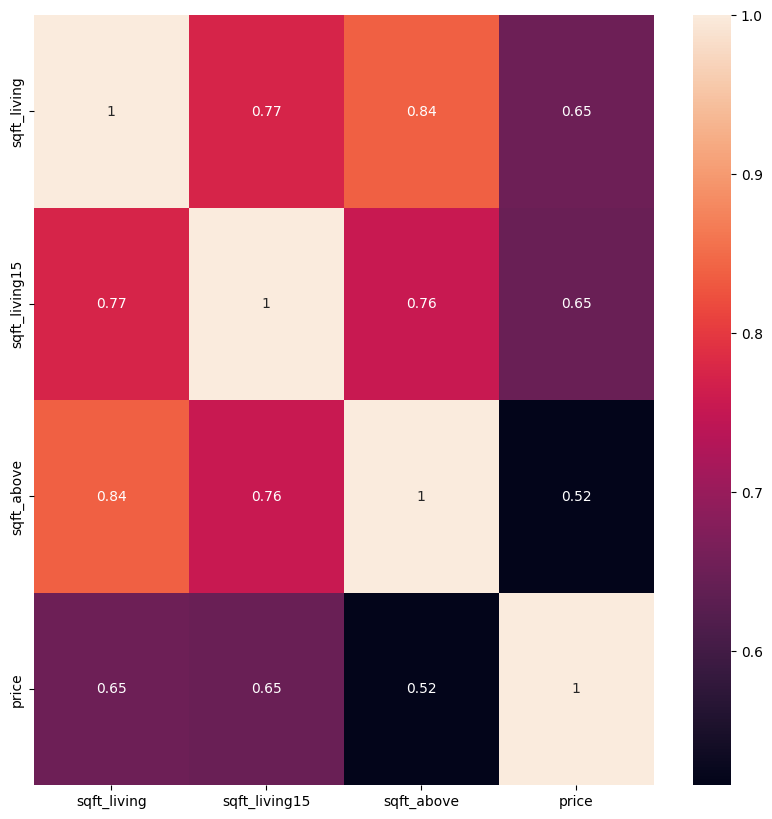

In [ ]:
# Membuat figure dengan ukuran 10x10 inch
plt.figure(figsize=(10,10))

# Membuat heatmap dari matriks korelasi data
#   - `data.corr()`: Menghitung matriks korelasi dari DataFrame `data`
#   - `annot=True`: Menampilkan nilai korelasi pada setiap sel heatmap
sns.heatmap(data.corr(), annot=True)

# Menampilkan plot
plt.show()

Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

# Split Dataset

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

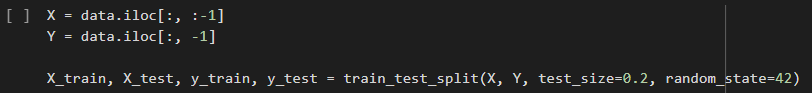

In [ ]:
# x diisi dengan semua kolom dari dataframe 'data' kecuali kolom terakhir
X = data.iloc[:, :-1]

# y diisi dengan kolom terakhir dari dataframe 'data' (biasanya ini adalah kolom target/label)
Y = data.iloc[:, -1]

# Memisahkan data menjadi set pelatihan (train) dan set pengujian (test)
# 'test_size=0.2' berarti 20% data digunakan untuk pengujian, sisanya untuk pelatihan
# 'random_state=42' memastikan hasil pemisahan data yang konsisten setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# untuk melihat data yg kita coding di atas
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(80, 3)
(20, 3)
(80,)
(20,)


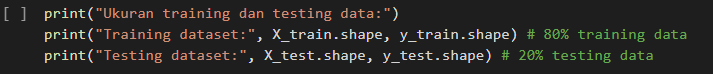

In [ ]:
# Mencetak informasi ukuran dari dataset yg kita latih dan uji diatas
print('Ukuran training dan testing data:')
print('Training dataset:', X_train.shape, y_train.shape)
print('Testing dataset:', X_test.shape, y_test.shape)

Ukuran training dan testing data:
Training dataset: (80, 3) (80,)
Testing dataset: (20, 3) (20,)


# 2. Modeling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


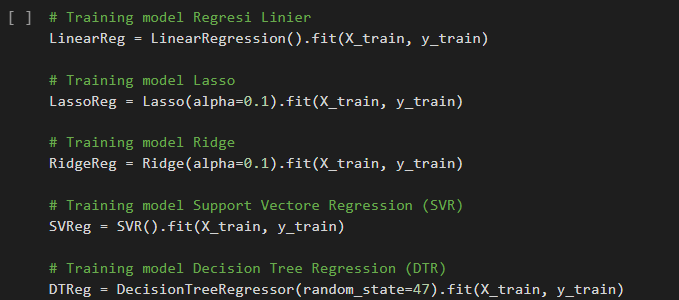

In [ ]:
# Membagi data menjadi data latih (X_train, y_train) dan data uji (X_test, y_test)
# (Asumsikan pembagian data sudah dilakukan sebelumnya)

# Membuat model regresi linear dan Melatih model regresi linear dengan data latih
linearReg = LinearRegression().fit(X_train, y_train)

# Membuat model regresi Lasso dengan parameter alpha=0.1 dan Melatih model regresi lasso dengan data latih
lassoReg = Lasso(alpha=0.1).fit(X_train, y_train)

# Membuat model regresi Ridge dengan parameter alpha=0.1 dan Melatih model regresi Ridge dengan data latih
ridgeReg = Ridge(alpha=0.1).fit(X_train, y_train)

# Membuat model Support Vector Regression (SVR) dan Melatih model SVR dengan data latih
SVReg = SVR().fit(X_train, y_train)

# Membuat model Decision Tree Regression dengan pengaturan random_state=47 dan Melatih model DTR dengan data latih
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train)


**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# 3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

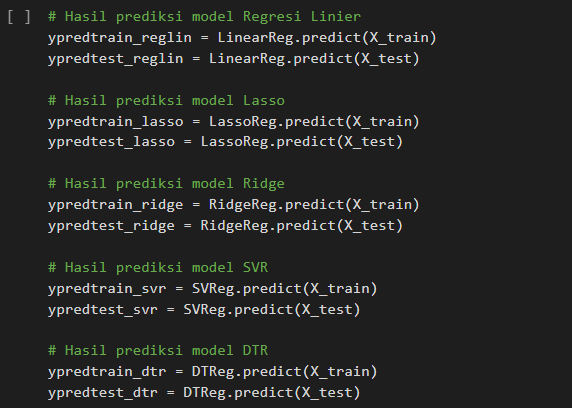

In [ ]:
# Membuat prediksi menggunakan model regresi linear pada data latih dan uji
ypredtrain_reglin = linearReg.predict(X_train)
ypredtest_reglin = linearReg.predict(X_test)

# Membuat prediksi menggunakan model Lasso pada data latih dan uji
ypredtrain_lasso = lassoReg.predict(X_train)
ypredtest_lasso = lassoReg.predict(X_test)

# Membuat prediksi menggunakan model Ridge pada data latih dan uji
ypredtrain_ridge = ridgeReg.predict(X_train)
ypredtest_ridge = ridgeReg.predict(X_test)

# Membuat prediksi menggunakan model SVR pada data latih dan uji
ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

# Membuat prediksi menggunakan model Decision Tree pada data latih dan uji
ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)




Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

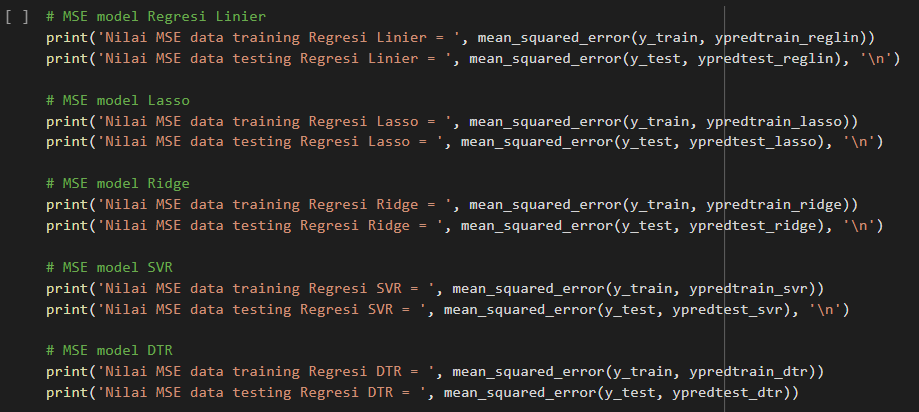

In [ ]:
# Hitung dan cetak Mean Squared Error (MSE) untuk setiap model pada data latih dan uji

# MSE untuk model Regresi Linear
print("Nilai MSE data training Regresi linear:", mean_squared_error(y_train, ypredtrain_reglin))
print("Nilai MSE data testing Regresi linear:", mean_squared_error(y_test, ypredtest_reglin), "\n")

# MSE untuk model Lasso
print("Nilai MSE data training Regresi lasso:", mean_squared_error(y_train, ypredtrain_lasso))
print("Nilai MSE data testing Regresi lasso:", mean_squared_error(y_test, ypredtest_lasso), "\n")

# MSE untuk model Ridge
print("Nilai MSE data training Regresi ridge:", mean_squared_error(y_train, ypredtrain_ridge))
print("Nilai MSE data testing Regresi ridge:", mean_squared_error(y_test, ypredtest_ridge), "\n")

# MSE untuk model SVR
print("Nilai MSE data training Regresi SVR:", mean_squared_error(y_train, ypredtrain_svr))
print("Nilai MSE data testing Regresi SVR:", mean_squared_error(y_test, ypredtest_svr), "\n")

# MSE untuk model Decision Tree
print("Nilai MSE data training Regresi DTR:", mean_squared_error(y_train, ypredtrain_dtr))
print("Nilai MSE data testing Regresi DTR:", mean_squared_error(y_test, ypredtest_dtr))

Nilai MSE data training Regresi linear: 51040616225.03679
Nilai MSE data testing Regresi linear: 32881775262.15838 

Nilai MSE data training Regresi lasso: 51040616225.03679
Nilai MSE data testing Regresi lasso: 32881775271.07427 

Nilai MSE data training Regresi ridge: 51040616225.0368
Nilai MSE data testing Regresi ridge: 32881775254.902454 

Nilai MSE data training Regresi SVR: 113673471256.08711
Nilai MSE data testing Regresi SVR: 37393496977.231895 

Nilai MSE data training Regresi DTR: 455625000.0
Nilai MSE data testing Regresi DTR: 40958648000.0


Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

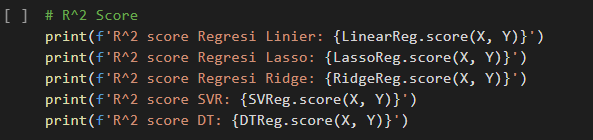

In [ ]:
# UNTUK MELIHAT SCORE PADA CODINGAN YG SEBELUMNYA KITA BUAT
print(f'R^2 score Regresi linier:{linearReg.score(X,Y)}')
print(f'R^2 score Regresi lasso:{lassoReg.score(X,Y)}')
print(f'R^2 score Regresi ridge:{ridgeReg.score(X,Y)}')
print(f'R^2 score SVR:{SVReg.score(X,Y)}')
print(f'R^2 score DTR:{DTReg.score(X,Y)}')



R^2 score Regresi linier:0.48353037146199596
R^2 score Regresi lasso:0.48353037144257016
R^2 score Regresi ridge:0.4835303714778053
R^2 score SVR:-0.07215508470730314
R^2 score DTR:0.906788861012355


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## Visualisasi Hasil Prediksi dengan Data Sebenarnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

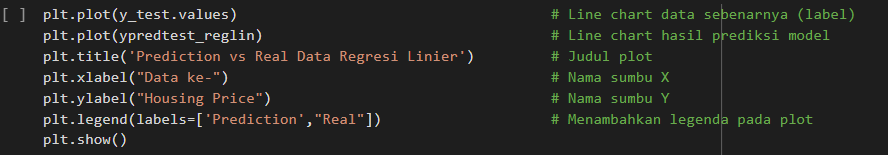

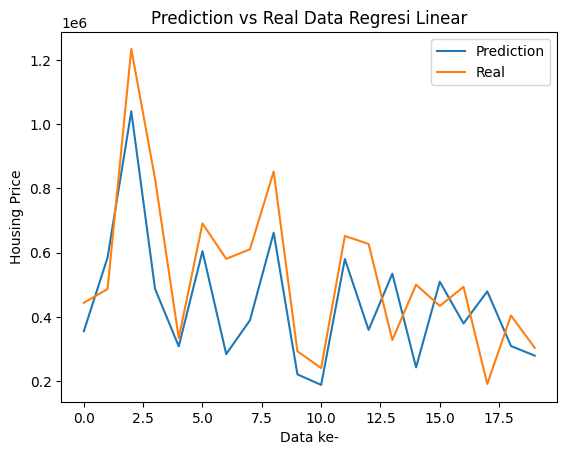

In [ ]:
# Asumsikan y_test_values dan ypredtest_reglin sudah didefinisikan sebelumnya

# Membuat plot garis untuk membandingkan data aktual dengan prediksi model regresi linear
plt.plot(y_test.values)  # Plot data aktual (nilai sebenarnya)
plt.plot(ypredtest_reglin)  # Plot hasil prediksi model regresi linear

# Memberikan judul dan label pada plot
plt.title('Prediction vs Real Data Regresi Linear')  # Judul plot
plt.xlabel("Data ke-")  # Label sumbu x (nomor data)
plt.ylabel("Housing Price")  # Label sumbu y (harga rumah)

# Menambahkan legenda untuk membedakan antara data aktual dan prediksi
plt.legend(labels=['Prediction', 'Real'])

# Menampilkan plot
plt.show()


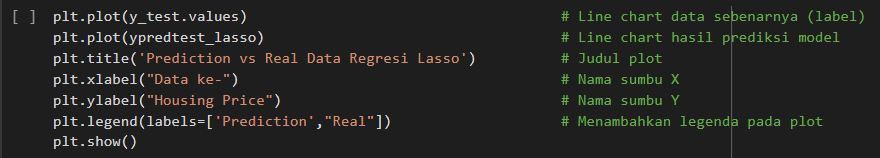

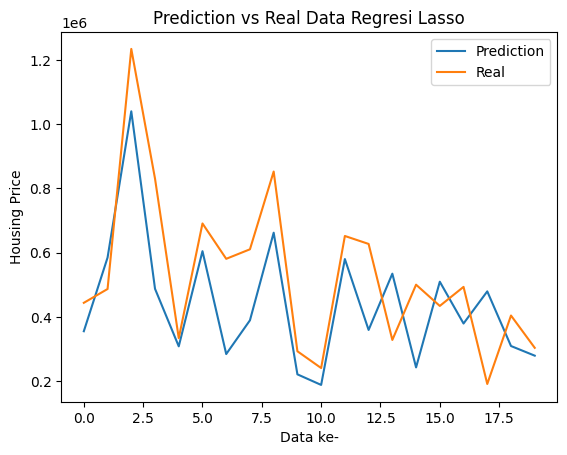

In [ ]:
# Asumsikan y_test_values dan ypredtest_lasso sudah didefinisikan sebelumnya

# Membuat plot garis untuk membandingkan data aktual dengan prediksi model regresi lasso
plt.plot(y_test.values)  # Plot data aktual (nilai sebenarnya)
plt.plot(ypredtest_lasso)  # Plot hasil prediksi model regresi lasso

# Memberikan judul dan label pada plot
plt.title('Prediction vs Real Data Regresi Lasso')  # Judul plot
plt.xlabel("Data ke-")  # Label sumbu x (nomor data)
plt.ylabel("Housing Price")  # Label sumbu y (harga rumah)

# Menambahkan legenda untuk membedakan antara data aktual dan prediksi
plt.legend(labels=['Prediction', 'Real'])

# Menampilkan plot
plt.show()


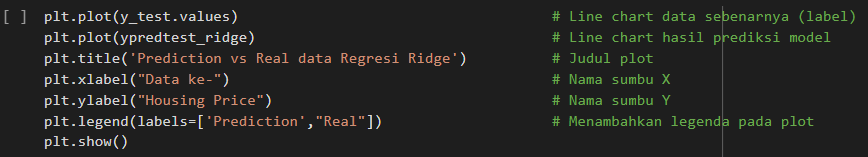

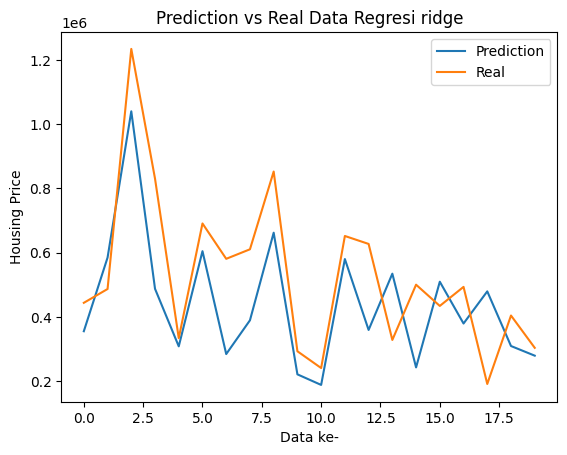

In [ ]:
# Asumsikan y_test_values dan ypredtest_ridge sudah didefinisikan sebelumnya

# Membuat plot garis untuk membandingkan data aktual dengan prediksi model regresi ridge
plt.plot(y_test.values)  # Plot data aktual (nilai sebenarnya)
plt.plot(ypredtest_ridge)  # Plot hasil prediksi model regresi ridge

# Memberikan judul dan label pada plot
plt.title('Prediction vs Real Data Regresi ridge')  # Judul plot
plt.xlabel("Data ke-")  # Label sumbu x (nomor data)
plt.ylabel("Housing Price")  # Label sumbu y (harga rumah)

# Menambahkan legenda untuk membedakan antara data aktual dan prediksi
plt.legend(labels=['Prediction', 'Real'])

# Menampilkan plot
plt.show()



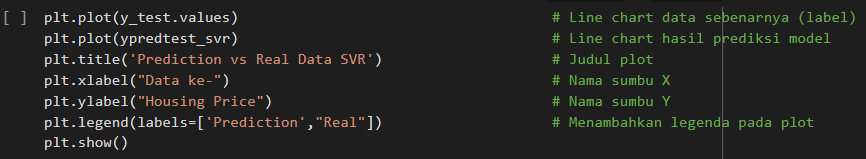

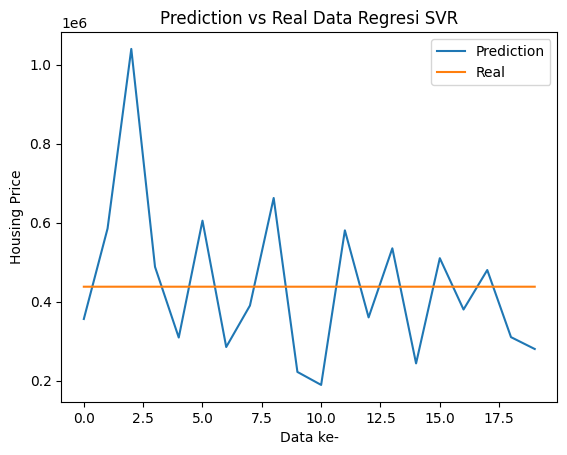

In [ ]:
# Asumsikan y_test_values dan ypredtest_svr sudah didefinisikan sebelumnya

# Membuat plot garis untuk membandingkan data aktual dengan prediksi model regresi svr
plt.plot(y_test.values)  # Plot data aktual (nilai sebenarnya)
plt.plot(ypredtest_svr)  # Plot hasil prediksi model regresi svr

# Memberikan judul dan label pada plot
plt.title('Prediction vs Real Data Regresi SVR')  # Judul plot
plt.xlabel("Data ke-")  # Label sumbu x (nomor data)
plt.ylabel("Housing Price")  # Label sumbu y (harga rumah)

# Menambahkan legenda untuk membedakan antara data aktual dan prediksi
plt.legend(labels=['Prediction', 'Real'])

# Menampilkan plot
plt.show()



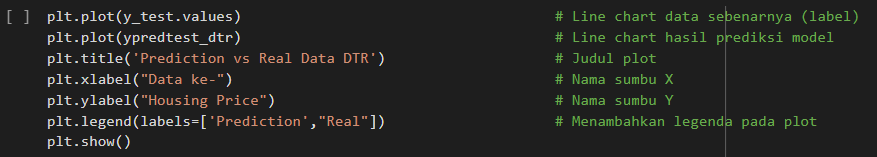

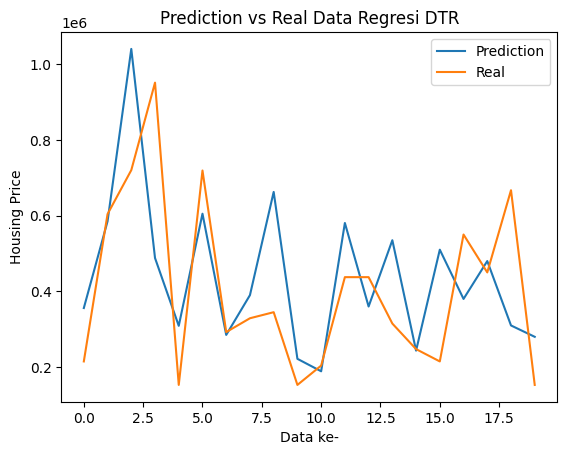

In [ ]:
# Asumsikan y_test_values dan ypredtest_dtr sudah didefinisikan sebelumnya

# Membuat plot garis untuk membandingkan data aktual dengan prediksi model regresi dtr
plt.plot(y_test.values)  # Plot data aktual (nilai sebenarnya)
plt.plot(ypredtest_dtr)  # Plot hasil prediksi model regresi dtr

# Memberikan judul dan label pada plot
plt.title('Prediction vs Real Data Regresi DTR')  # Judul plot
plt.xlabel("Data ke-")  # Label sumbu x (nomor data)
plt.ylabel("Housing Price")  # Label sumbu y (harga rumah)

# Menambahkan legenda untuk membedakan antara data aktual dan prediksi
plt.legend(labels=['Prediction', 'Real'])

# Menampilkan plot
plt.show()



# Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

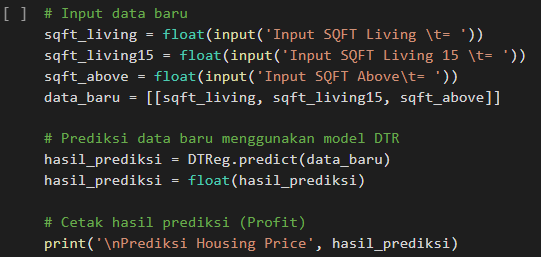

In [ ]:
# Input data baru
sqft_living = float(input("Input SQFT Living \t"))
sqft_living15 = float(input("Input SQFT Living 15 \t"))
sqft_above = float(input("Input SQFT Above\t"))

data_baru = [[sqft_living, sqft_living15, sqft_above]]

# Prediksi data baru menggunakan model DTR
hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print("\nPrediksi Housing Price:", hasil_prediksi)


Input SQFT Living 	45
Input SQFT Living 15 	23
Input SQFT Above	56

Prediksi Housing Price: 450000.0


# Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('housing_price.csv')
features = ['total_rooms', 'housing_median_age', 'population']
X = data[features]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

tree_reg = DecisionTreeRegressor(random_state=30)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

forest_reg = RandomForestRegressor(n_estimators=100, random_state=30)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R^2: {r2:.3f}')

evaluate_model('Linear Regression', y_test, y_pred_lr)
evaluate_model('Decision Tree', y_test, y_pred_tree)
evaluate_model('Random Forest', y_test, y_pred_forest)

best_model = 'Random Forest' if r2_score(y_test, y_pred_forest) > max(r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_tree)) else 'Linear Regression'
print(f'The best model is {best_model}')

Linear Regression - MSE: 15528528254.03, R^2: -0.290
Decision Tree - MSE: 16541690750.05, R^2: -0.374
Random Forest - MSE: 15067506204.10, R^2: -0.251
The best model is Random Forest
